In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from halotools.sim_manager import CachedHaloCatalog

from HOD_models_fix import decorated_hod_model

from halotools.empirical_models import MockFactory

from halotools.mock_observables import return_xyz_formatted_array

In [3]:
halocat = CachedHaloCatalog(simname = 'bolplanck', version_name = 'halotools_v0p4',redshift = 0, \
                                halo_finder = 'rockstar')

In [4]:
p21 = np.array((1.33738,13.98811,0.55950,11.95797,12.82356,0,0))

In [42]:
model = decorated_hod_model()

In [6]:
param_names = ('alpha','logM1','sigma_logM','logM0','logMmin','mean_occupation_centrals_assembias_param1','mean_occupation_satellites_assembias_param1')

In [7]:
model.param_dict.update(dict(zip(param_names, p21)))    ##update model.param_dict with pairs (param_names:params)

In [8]:
model.param_dict

{'alpha': 1.33738,
 'logM0': 11.95797,
 'logM1': 13.988110000000001,
 'logMmin': 12.823560000000001,
 'mean_occupation_centrals_assembias_param1': 0.0,
 'mean_occupation_satellites_assembias_param1': 0.0,
 'sigma_logM': 0.5595}

In [9]:
seed = 12345

In [10]:
try:
    model.mock.populate(seed=seed)#specify seed, single integer
except:
    model.populate_mock(halocat, seed=seed)#specify seed
    

In [11]:
pos_gals = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), period=250.)

In [13]:
for Asat in np.linspace(-1,1,41):
    model.param_dict.update(dict(zip(param_names, p21+np.array((0,0,0,0,0,0,Asat)))))
    try:
        model.mock.populate(seed=63)#specify seed, single integer
    except:
        model.populate_mock(halocat, seed=63)#specify seed
    print len(model.mock.galaxy_table)

18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340
18340


In [28]:
mask = np.logical_and(pos_gals[:,0]<30,pos_gals[:,1]<30,pos_gals[:,2]<30)

In [29]:
from mpl_toolkits.mplot3d import axes3d

<IPython.core.display.Javascript object>


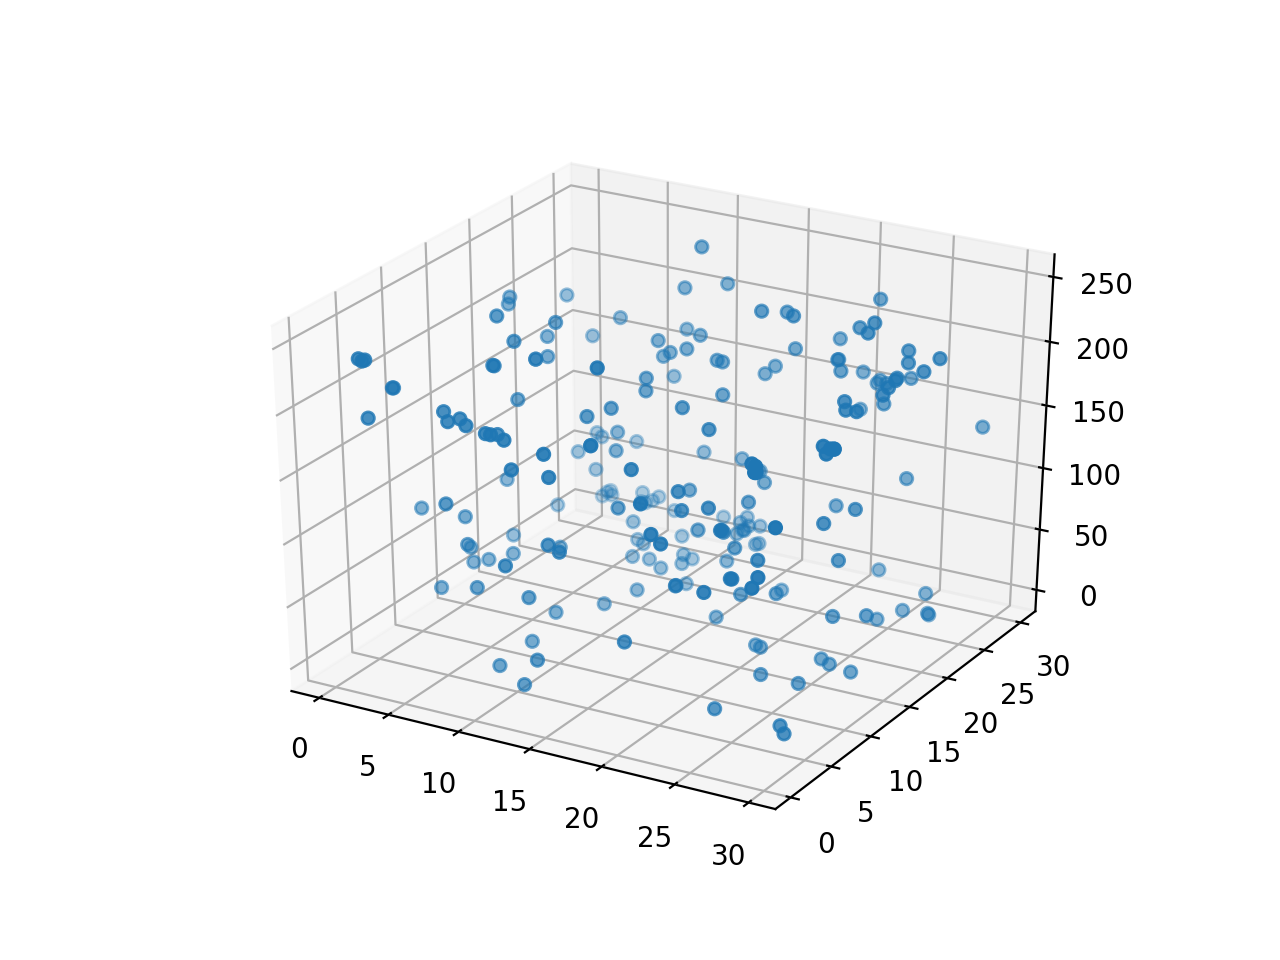

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos_gals[mask][:,0],pos_gals[mask][:,1],pos_gals[mask][:,2])

In [15]:
model.param_dict.update(dict(zip(param_names, p21+0.1*np.ones(7))))

In [16]:
model.param_dict

{'alpha': 1.4373800000000001,
 'logM0': 12.057969999999999,
 'logM1': 14.08811,
 'logMmin': 12.92356,
 'mean_occupation_centrals_assembias_param1': 0.10000000000000001,
 'mean_occupation_satellites_assembias_param1': 0.10000000000000001,
 'sigma_logM': 0.65949999999999998}

In [17]:
try:
    model.mock.populate(seed=seed)#specify seed, single integer
except:
    model.populate_mock(halocat, seed=seed)#specify seed
    

In [18]:
pos_gals1 = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), period=250.)

In [31]:
mask1 = np.logical_and(pos_gals1[:,0]<30,pos_gals1[:,1]<30,pos_gals1[:,2]<30)

<IPython.core.display.Javascript object>


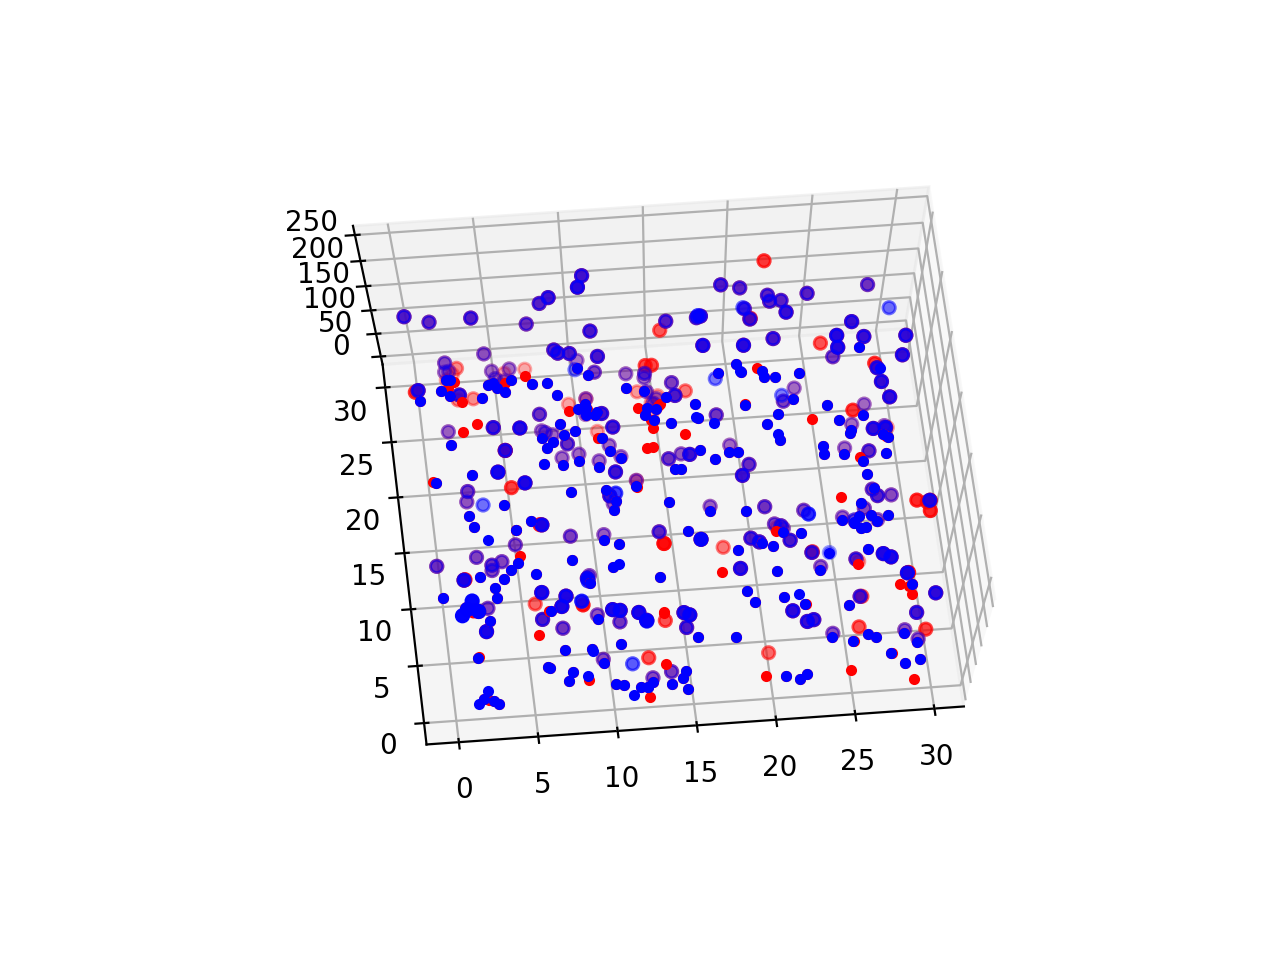

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos_gals[mask][:,0],pos_gals[mask][:,1],pos_gals[mask][:,2],color='r')
ax.scatter(pos_gals1[mask1][:,0],pos_gals1[mask1][:,1],pos_gals1[mask1][:,2],color='b')

<IPython.core.display.Javascript object>


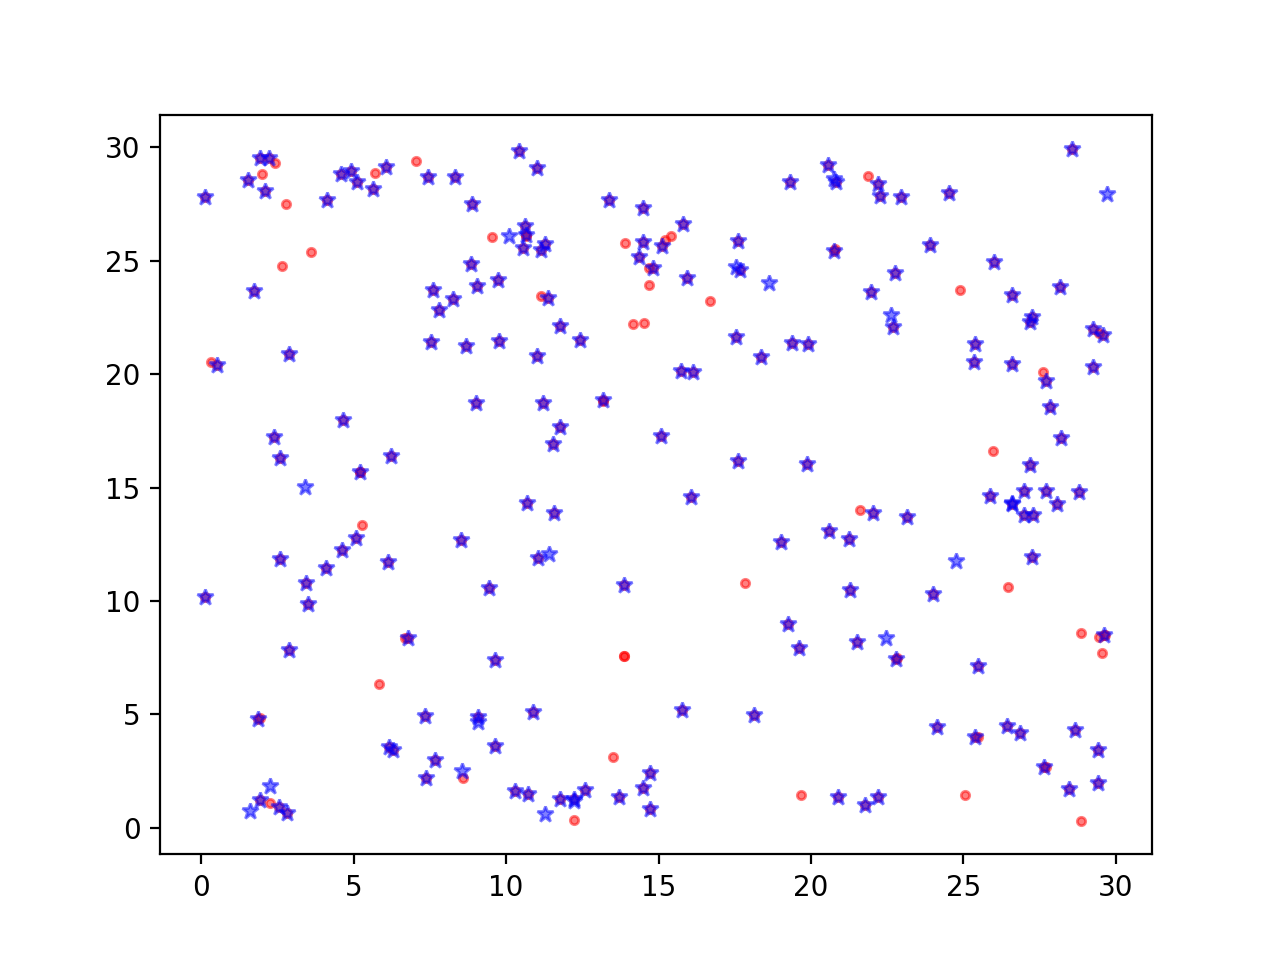

In [41]:
fig = plt.figure()
plt.plot(pos_gals[mask][:,0],pos_gals[mask][:,1],'r.',alpha=0.5)
plt.plot(pos_gals1[mask1][:,0],pos_gals1[mask1][:,1],'b*',alpha=0.5)

In [42]:
try:
    model.mock.populate(seed=seed+100)#specify seed, single integer
except:
    model.populate_mock(halocat, seed=seed+100)#specify seed
    

In [43]:
pos_gals2 = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), period=250.)

In [44]:
mask2 = np.logical_and(pos_gals2[:,0]<30,pos_gals2[:,1]<30,pos_gals2[:,2]<30)

<IPython.core.display.Javascript object>


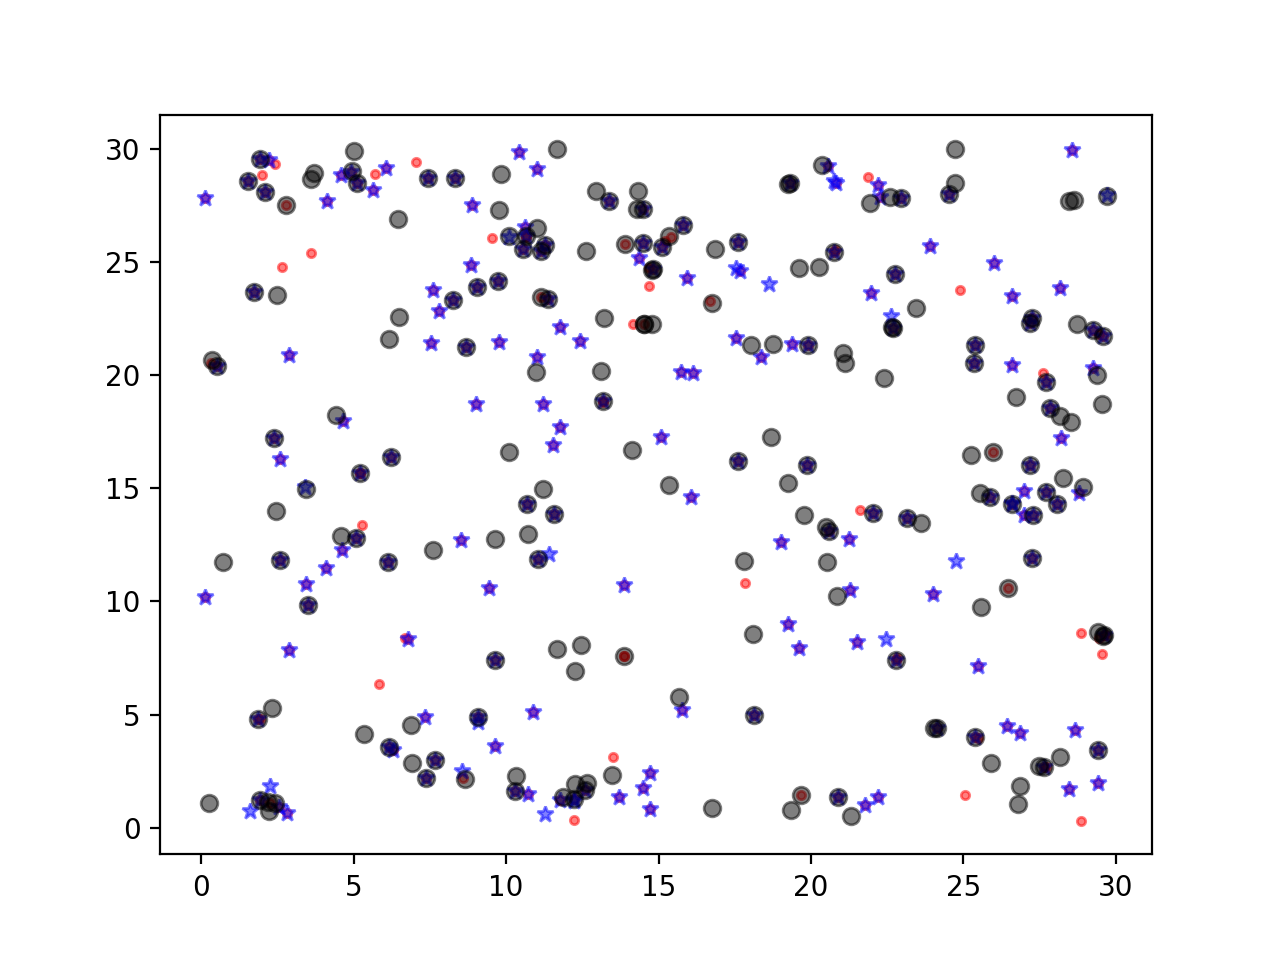

In [45]:
fig = plt.figure()
plt.plot(pos_gals[mask][:,0],pos_gals[mask][:,1],'r.',alpha=0.5)
plt.plot(pos_gals1[mask1][:,0],pos_gals1[mask1][:,1],'b*',alpha=0.5)
plt.plot(pos_gals2[mask2][:,0],pos_gals2[mask2][:,1],'ko',alpha=0.5)

In [14]:
a = np.load('Run_061218/bolp_20p0_um_0_b_250.npz')

In [18]:
a['func_all'][-200:,0]

array([ 0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650342,  0.00650342,  0.00650349,  0.00650342,
        0.00650362,  0.00650342,  0.00650362,  0.00650355,  0.00650362,
        0.00650336,  0.00650342,  0.00650362,  0.00650349,  0.00650362,
        0.00650362,  0.00650362,  0.00650349,  0.00650362,  0.00650362,
        0.00650362,  0.00650342,  0.00650362,  0.00650362,  0.00650317,
        0.00650362,  0.00650362,  0.00650349,  0.00650362,  0.00650298,
        0.00650323,  0.00650362,  0.00650342,  0.00650362,  0.00650342,
        0.00650362,  0.00650298,  0.00650342,  0.00650362,  0.00650362,
        0.00650342,  0.00650362,  0.00650362,  0.00650362,  0.00650349,
        0.00650362,  0.00650362,  0.00650362,  0.00650317,  0.00650362,
        0.00650291,  0.00650362,  0.00650349,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650291,  0.00650362,  0.00650362,
        0.00650362,  0.00650291,  0.00650362,  0.00650362,  0.00

In [27]:
a['param'][-200:,6]

array([-0.47828425,  0.36897956,  0.01754533,  0.46004903, -0.31823889,
        0.4403568 , -0.81398174, -0.81844246,  0.67415593,  0.72024343,
       -0.26151033,  0.74194462, -0.32355735, -0.65742235, -0.15066542,
        0.81489496,  0.75775267,  0.48642332,  0.66240257,  0.1532304 ,
       -0.16491161,  0.22074291, -0.70698435,  0.20821885, -0.28002617,
        0.03183758, -0.8172286 ,  0.48033494, -0.44271017,  0.88012462,
       -0.27174978, -0.42431181, -0.67872925,  0.3520843 , -0.96981089,
        0.84786291, -0.39556892,  0.80436285,  0.32209888, -0.80322657,
       -0.15979859, -0.96976853,  0.72206194, -0.56048195, -0.08634418,
       -0.77360269,  0.45161508, -0.03780605, -0.270261  ,  0.65488764,
       -0.08801266,  0.57569714,  0.37401905, -0.92344506, -0.14675503,
        0.96717917,  0.39165375,  0.66524468,  0.39242709,  0.5083063 ,
       -0.48454864,  0.24069109,  0.96760788, -0.06628499, -0.28441487,
        0.08788886,  0.95680736,  0.23759261, -0.40837471,  0.24

In [ ]:
import collections
import gc
import numpy as np
from HOD_models_fix import decorated_hod_model

from halotools.sim_manager import CachedHaloCatalog
from halotools.mock_observables import return_xyz_formatted_array

##########################################################

param_names = ('alpha','logM1','sigma_logM','logM0','logMmin','mean_occupation_centrals_assembias_param1','mean_occupation_satellites_assembias_param1')


##########################################################

seed = np.random.randint(1000)
print seed

Lbox = 250.



##########################################################

def calc_all_observables(param,seed=seed):

    model.param_dict.update(dict(zip(param_names, param)))    ##update model.param_dict with pairs (param_names:params)
    
    try:
        model.mock.populate(seed=seed)
    except:
        model.populate_mock(halocat, seed=seed)
    
    gc.collect()
    
    output = []
    
    pos_gals_d = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), \
            velocity=model.mock.galaxy_table['vz'], velocity_distortion_dimension='z',\
                                          period=Lbox)             ##redshift space distorted
    pos_gals_d = np.array(pos_gals_d,dtype=float)
    
    
    
    func = np.array((pos_gals_d.shape[0]/float(Lbox**3),))
    return func

############################################################

def main(model_gen_func, fiducial):
    global model
    model = model_gen_func()
    global fid
    fid = np.array(fiducial)
    params = fid*np.ones((7*args.Nparam,7))
    dp_range = np.array((0.11,0.4,0.225,0.9,0.2))

    for i in range(5):
        params[args.Nparam*i:args.Nparam*(i+1),i] += (2.*np.random.random(args.Nparam)-1)*min(dp_range[i],fid[i])
    params[args.Nparam*5:args.Nparam*6,5] = 2.*np.random.random(args.Nparam)-1
    params[args.Nparam*6:args.Nparam*7,6] = 2.*np.random.random(args.Nparam)-1


    
    output_dict = collections.defaultdict(list)
    nproc = args.nproc
    
    global halocat
    
    halocat = CachedHaloCatalog(simname = 'bolplanck', version_name = 'halotools_v0p4',redshift = 0, \
                                halo_finder = 'rockstar')

if __name__ == '__main__':
    main(decorated_hod_model, np.array((1.14385, 13.28584, 0.34846, 11.30750, 11.97186, 0, 0)))




In [55]:
p20 = np.array((1.14385, 13.28584, 0.34846, 11.30750, 11.97186, 0, 0))

In [56]:
model.param_dict.update(dict(zip(param_names, p20)))

In [57]:
model.param_dict

{'alpha': 1.14385,
 'logM0': 11.307499999999999,
 'logM1': 13.28584,
 'logMmin': 11.97186,
 'mean_occupation_centrals_assembias_param1': 0.0,
 'mean_occupation_satellites_assembias_param1': 0.0,
 'sigma_logM': 0.34845999999999999}

In [58]:
model.param_dict['mean_occupation_satellites_assembias_param1'] = -0.81398174

In [59]:
model.param_dict

{'alpha': 1.14385,
 'logM0': 11.307499999999999,
 'logM1': 13.28584,
 'logMmin': 11.97186,
 'mean_occupation_centrals_assembias_param1': 0.0,
 'mean_occupation_satellites_assembias_param1': -0.81398174,
 'sigma_logM': 0.34845999999999999}

In [61]:
Lbox=250

In [62]:
try:
    model.mock.populate(seed=63)
except:
    model.populate_mock(halocat, seed=63)

pos_gals_d = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), \
        velocity=model.mock.galaxy_table['vz'], velocity_distortion_dimension='z',\
                                          period=Lbox)             ##redshift space distorted
pos_gals_d = np.array(pos_gals_d,dtype=float)
    
    
    
print np.array((pos_gals_d.shape[0]/float(Lbox**3),))

[ 0.00649107]


In [81]:
model.param_dict['mean_occupation_satellites_assembias_param1'] = 0.88882244

In [82]:
model.param_dict

{'alpha': 1.14385,
 'logM0': 11.307499999999999,
 'logM1': 13.28584,
 'logMmin': 11.97186,
 'mean_occupation_centrals_assembias_param1': 0.0,
 'mean_occupation_satellites_assembias_param1': 0.88882244,
 'sigma_logM': 0.34845999999999999}

In [83]:
try:
    model.mock.populate(seed=250)
except:
    model.populate_mock(halocat, seed=250)

In [84]:
pos_gals_d = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), \
        velocity=model.mock.galaxy_table['vz'], velocity_distortion_dimension='z',\
                                          period=Lbox)             ##redshift space distorted
pos_gals_d = np.array(pos_gals_d,dtype=float)
    
    
    
print np.array((pos_gals_d.shape[0]/float(Lbox**3),))

[ 0.00650317]


In [85]:
model.param_dict['mean_occupation_satellites_assembias_param1'] = 0.294655

In [86]:
try:
    model.mock.populate(seed=250)
except:
    model.populate_mock(halocat, seed=250)

In [87]:
pos_gals_d = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), \
        velocity=model.mock.galaxy_table['vz'], velocity_distortion_dimension='z',\
                                          period=Lbox)             ##redshift space distorted
pos_gals_d = np.array(pos_gals_d,dtype=float)
    
    
    
print np.array((pos_gals_d.shape[0]/float(Lbox**3),))

[ 0.00650362]


In [78]:
a['func_all'][-400:-200,0]

array([ 0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00650362,
        0.00650362,  0.00650362,  0.00650362,  0.00650362,  0.00